In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', header=None)
df = df.drop(df.columns[9], axis=1)

df2 = pd.read_csv('times32-allSmallCores.csv', header=None)
df3 = pd.read_csv('times32-allBigCores.csv', header=None)

In [3]:
smallY = []
bigY = []

for i in range(30):
    num1 = np.array(df2.iloc[i, 1:])
    num2 = np.array(df3.iloc[i, 1:])
    smallY.append(num1.mean())
    bigY.append(num2.mean())

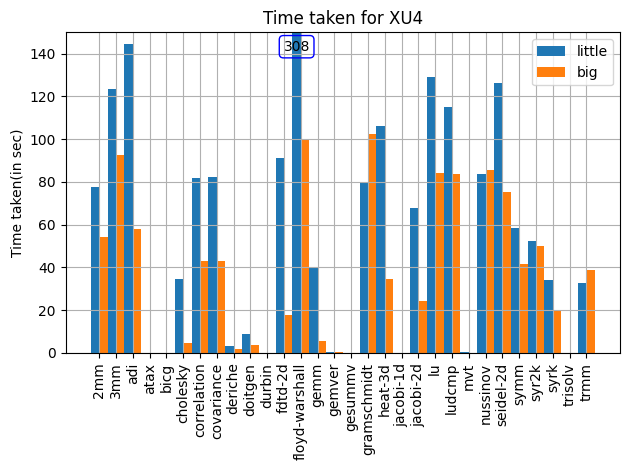

In [4]:
Y1 = []
Y2 = []

for i in range(30):
    num1 = np.array(df.iloc[i, 1:5])
    num2 = np.array(df.iloc[i, 5:])
    Y1.append(num1.mean())
    Y2.append(num2.mean())

X_ = np.array(df.iloc[:, 0])
X=[]
for x in X_:
    X.append(x[:-5])
# print(X)
# barWidth = 0.5
# x = np.arange(len(X))
# #fig = plt.figure(figsize=(8, 6))
# plt.bar(x, Y1, width=barWidth-0.05, label='A7')
# plt.bar(x+barWidth-0.05, Y2, width=barWidth-0.05, label='A15')
# plt.xticks(x+barWidth/2, X,rotation=90)
# plt.xlabel('program_name')
# plt.ylabel('time(in msec)')
# plt.title('32-bit XU4 arm board results')
# plt.grid()
# plt.legend()
# plt.tight_layout()
# plt.savefig('32-bit.png')
# plt.show()

barWidth = 0.5
x = np.arange(len(X))

# Plotting the bar graph
plt.bar(x, Y1, width=barWidth, label="little")
plt.bar(x + barWidth, Y2, width=barWidth, label="big")

# Set y-axis limit
plt.ylim(0, 150)

t2 = 125
t1 = 140
# Annotate bars that exceed the y-axis limit
for i, (e3, e4) in enumerate(zip(Y1, Y2)):
    if e3 > plt.ylim()[1]:        
        plt.text(i, 140, f'{e3:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='blue', facecolor='none', linewidth=1))

    if e4 > plt.ylim()[1]:
        if(t2==125):
            t2=145
        else:
            t2=125
        plt.text(i + barWidth, t2, f'{e4:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='orange', facecolor='none', linewidth=1))

plt.ylabel("Time taken(in sec)")
plt.xticks(x + barWidth / 2, X, rotation=90)
plt.grid()
plt.legend()
plt.title("Time taken for XU4")
plt.tight_layout()
plt.savefig("timesXU4.png")
plt.show()


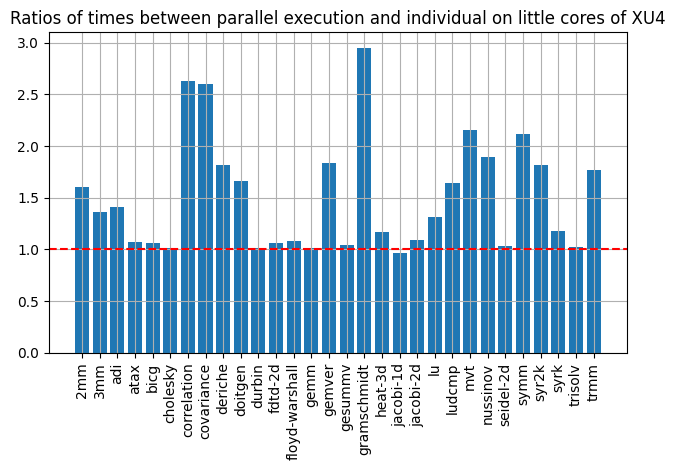

In [5]:
# Ratio of time for parallel execution of small cores vs individual execution of small cores

# time taken by small core / time taken by big cores

Y = []
for i in range(30):
    Y.append(smallY[i]/Y1[i])

# Plotting the bar graph with adjusted bar width and positions
fig, ax = plt.subplots()

# Adjust the width of each bar
bar_width = 0.8

# Compute the positions of the bars with additional space
bar_positions = np.arange(len(X)) * (bar_width + 0.2)

# Plot the bars
bars = plt.bar(bar_positions, Y, width=bar_width)

# Add a horizontal line at the y-axis limit
plt.axhline(y=1, linestyle='--', color='red')

# Annotate bars with their y-values if they exceed the y-axis limit

"""
for bar in bars:
    yval = bar.get_height()
    if yval > 3:
        plt.text(bar.get_x() + bar.get_width()/2, 2.75, f'{yval:.0f}', ha='center', va='bottom',color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

"""
# Customize the plot
plt.xticks(bar_positions, X, rotation=90)
plt.grid()
plt.title("Ratios of times between parallel execution and individual on little cores of XU4")
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("timeRatiosXU4_smallCores.png")
plt.show()

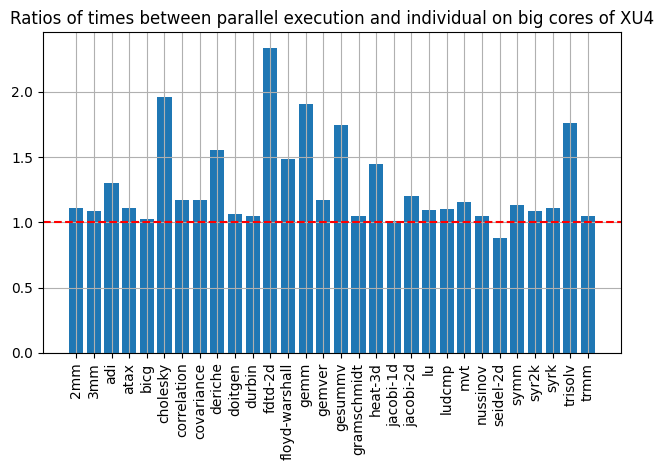

In [6]:
# Ratio of time for parallel execution of small cores vs individual execution of small cores

# time taken by small core / time taken by big cores

Y = []
for i in range(30):
    Y.append(bigY[i]/Y2[i])

# Plotting the bar graph with adjusted bar width and positions
fig, ax = plt.subplots()

# Adjust the width of each bar
bar_width = 0.8

# Compute the positions of the bars with additional space
bar_positions = np.arange(len(X)) * (bar_width + 0.2)

# Plot the bars
bars = plt.bar(bar_positions, Y, width=bar_width)

# Add a horizontal line at the y-axis limit
plt.axhline(y=1, linestyle='--', color='red')

# Annotate bars with their y-values if they exceed the y-axis limit

"""
for bar in bars:
    yval = bar.get_height()
    if yval > 3:
        plt.text(bar.get_x() + bar.get_width()/2, 2.75, f'{yval:.0f}', ha='center', va='bottom',color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

"""
# Customize the plot
plt.xticks(bar_positions, X, rotation=90)
plt.grid()
plt.title("Ratios of times between parallel execution and individual on big cores of XU4")
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("timeRatiosXU4_bigCores.png")
plt.show()

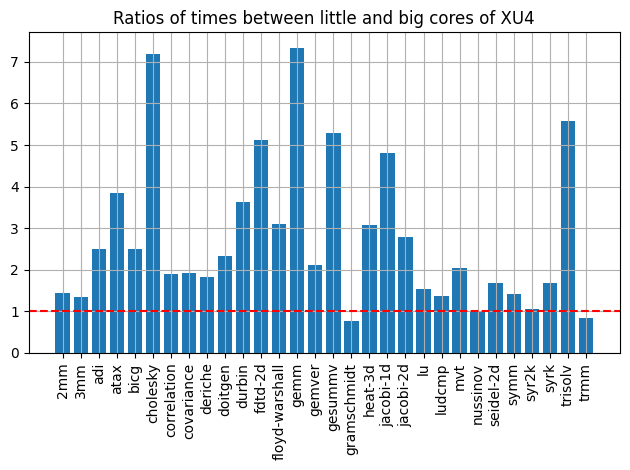

In [7]:
# time taken by small core / time taken by big cores

Y = []
for i in range(30):
    Y.append(Y1[i]/Y2[i])

# Plotting the bar graph with adjusted bar width and positions
fig, ax = plt.subplots()

# Adjust the width of each bar
bar_width = 0.8

# Compute the positions of the bars with additional space
bar_positions = np.arange(len(X)) * (bar_width + 0.2)

# Plot the bars
bars = plt.bar(bar_positions, Y, width=bar_width)

# Add a horizontal line at the y-axis limit
plt.axhline(y=1, linestyle='--', color='red')

# Annotate bars with their y-values if they exceed the y-axis limit

"""
for bar in bars:
    yval = bar.get_height()
    if yval > 3:
        plt.text(bar.get_x() + bar.get_width()/2, 2.75, f'{yval:.0f}', ha='center', va='bottom',color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

"""
# Customize the plot
plt.xticks(bar_positions, X, rotation=90)
plt.grid()
plt.title("Ratios of times between little and big cores of XU4")
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("timeRatiosXU4.png")
plt.show()

In [8]:
df = pd.read_csv('data2.csv', header=None)

df2 = pd.read_csv('times32-allSmallCores.csv', header=None)
df3 = pd.read_csv('times32-allBigCores.csv', header=None)

In [9]:
smallY = []
bigY = []

for i in range(30):
    num1 = np.array(df2.iloc[i, 1:])
    num2 = np.array(df3.iloc[i, 1:])
    smallY.append(num1.mean())
    bigY.append(num2.mean())

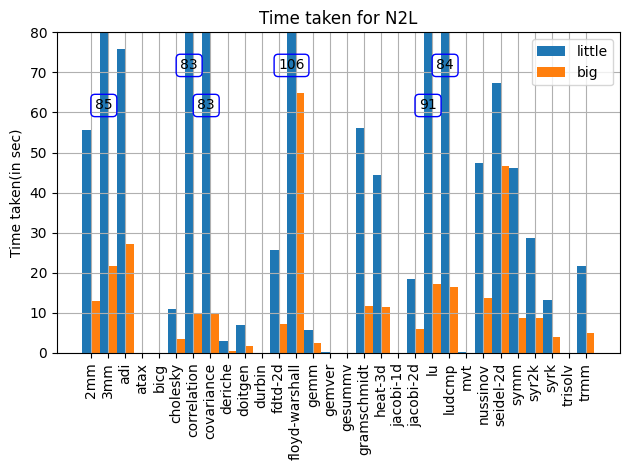

In [10]:
Y1 = []
Y2 = []

for i in range(30):
    num1 = np.array(df.iloc[i, 1:3])
    num2 = np.array(df.iloc[i, 3:])
    Y1.append(num1.mean())
    Y2.append(num2.mean())

X_ = np.array(df.iloc[:, 0])
X=[]
for x in X_:
    X.append(x[:-5])
# print(X)
# barWidth = 0.5
# x = np.arange(len(X))
# plt.bar(x, Y1, width=barWidth-0.05, label='A53')
# plt.bar(x+barWidth-0.05, Y2, width=barWidth-0.05,label='A73')
# plt.xticks(x+barWidth/2, X, rotation=90)
# plt.xlabel('program_name')
# plt.ylabel('time(in msec)')
# plt.title('64-bit N2L arm board results')
# plt.grid()
# plt.legend()
# plt.tight_layout()
# plt.savefig('64-bit.png')
# plt.show()

barWidth = 0.5
x = np.arange(len(X))

# Plotting the bar graph
plt.bar(x, Y1, width=barWidth, label="little")
plt.bar(x + barWidth, Y2, width=barWidth, label="big")

# Set y-axis limit
plt.ylim(0, 80)

t2 = 70
t1 = 70
# Annotate bars that exceed the y-axis limit
for i, (e3, e4) in enumerate(zip(Y1, Y2)):
    if e3 > plt.ylim()[1]:
        if(t1==70):
            t1=60
        else:
            t1=70
        plt.text(i, t1, f'{e3:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='blue', facecolor='none', linewidth=1))

    if e4 > plt.ylim()[1]:
        if(t2==70):
            t2=60
        else:
            t2=70
        plt.text(i + barWidth, t2, f'{e4:.0f}', ha='center', va='bottom', color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='orange', facecolor='none', linewidth=1))

plt.ylabel("Time taken(in sec)")
plt.xticks(x + barWidth / 2, X, rotation=90)
plt.grid()
plt.legend()
plt.title("Time taken for N2L")
plt.tight_layout()
plt.savefig("timesN2L.png")
plt.show()


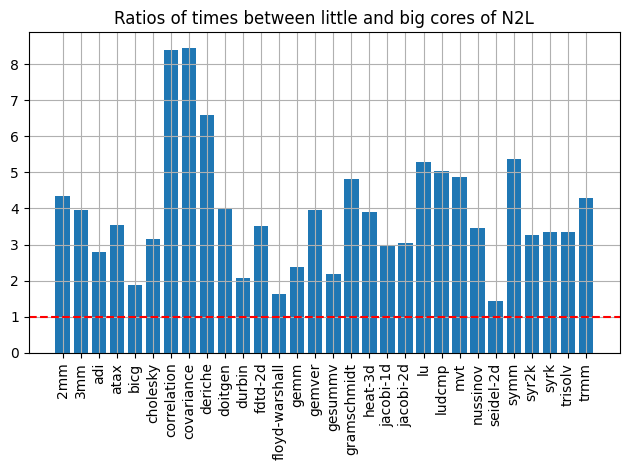

In [11]:
# time taken by small core / time taken by big cores

Y = []
for i in range(30):
    Y.append(Y1[i]/Y2[i])

# Plotting the bar graph with adjusted bar width and positions
fig, ax = plt.subplots()

# Adjust the width of each bar
bar_width = 0.8

# Compute the positions of the bars with additional space
bar_positions = np.arange(len(X)) * (bar_width + 0.2)

# Plot the bars
bars = plt.bar(bar_positions, Y, width=bar_width)

# Add a horizontal line at the y-axis limit
plt.axhline(y=1, linestyle='--', color='red')

# Annotate bars with their y-values if they exceed the y-axis limit

"""
for bar in bars:
    yval = bar.get_height()
    if yval > 3:
        plt.text(bar.get_x() + bar.get_width()/2, 2.75, f'{yval:.0f}', ha='center', va='bottom',color='black', fontsize=10,
                 bbox=dict(boxstyle='round', edgecolor='red', facecolor='none', linewidth=1))

"""
# Customize the plot
plt.xticks(bar_positions, X, rotation=90)
plt.grid()
plt.title("Ratios of times between little and big cores of N2L")
plt.tight_layout()

# Save the plot to a file and display
plt.savefig("timeRatiosN2L.png")
plt.show()